In [2]:
import pandas as pd
df=pd.read_csv('covid-19.csv')
print(df)

          Date                Country  Population  Total Tests  Total Cases  \
0     04/18/20                    USA   330774664    3722145.0     738792.0   
1     04/18/20                 Russia   145927292    1831892.0      36793.0   
2     04/18/20                  Spain    46752703     930230.0     194416.0   
3     04/18/20                 Brazil   212380932      62985.0      36722.0   
4     04/18/20                     UK    67844241     460437.0     114217.0   
...        ...                    ...         ...          ...          ...   
6598  05/18/20              St. Barth        9874          NaN          6.0   
6599  05/18/20         Western Sahara      595462          NaN          6.0   
6600  05/18/20               Anguilla       14987          NaN          3.0   
6601  05/18/20                Lesotho     2140235          NaN          1.0   
6602  05/18/20  Saint Pierre Miquelon        5797          NaN          1.0   

      Total Deaths  Total Recovered  Serious or Cri

In [3]:
df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [4]:
df.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

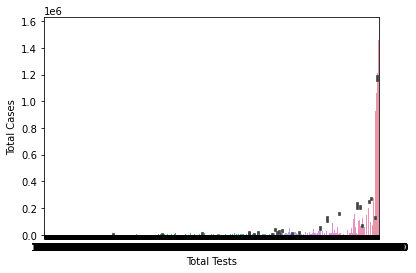

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Total Tests',y='Total Cases',data=df)
plt.show()

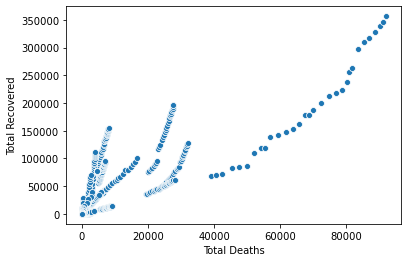

In [8]:
import seaborn as sns
sns.scatterplot(x="Total Deaths",y="Total Recovered",data=df)
plt.show()

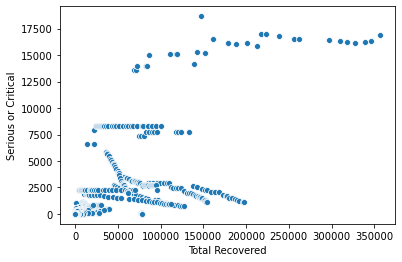

In [40]:
import seaborn as sns
sns.scatterplot(x="Total Recovered",y="Serious or Critical",data=df)
plt.show()

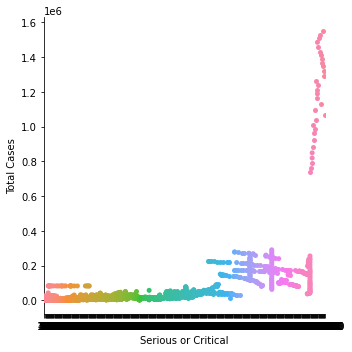

In [42]:
sns.catplot(x="Serious or Critical",y="Total Cases",data=df)
plt.show()

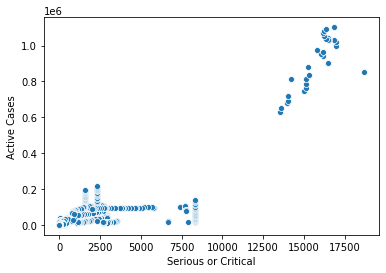

In [10]:
sns.scatterplot(x="Serious or Critical",y="Active Cases",data=df)
plt.show()

In [11]:
df.corr()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Population,1.000000,0.307950,0.225890,0.177861,0.309692,0.231260,0.179400
Total Tests,0.307950,1.000000,0.900321,0.811128,0.825681,0.744832,0.859148
Total Cases,0.225890,0.900321,1.000000,0.934705,0.829137,0.890988,0.977766
Total Deaths,0.177861,0.811128,0.934705,1.000000,0.840124,0.829517,0.892579
Total Recovered,0.309692,0.825681,0.829137,0.840124,1.000000,0.722190,0.694194
Serious or Critical,0.231260,0.744832,0.890988,0.829517,0.722190,1.000000,0.875427
Active Cases,0.179400,0.859148,0.977766,0.892579,0.694194,0.875427,1.000000


In [12]:
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In [13]:
df.skew()

Population              8.743503
Total Tests             8.528633
Total Cases            12.035097
Total Deaths            8.071158
Total Recovered         7.063236
Serious or Critical     7.265268
Active Cases           13.241984
dtype: float64

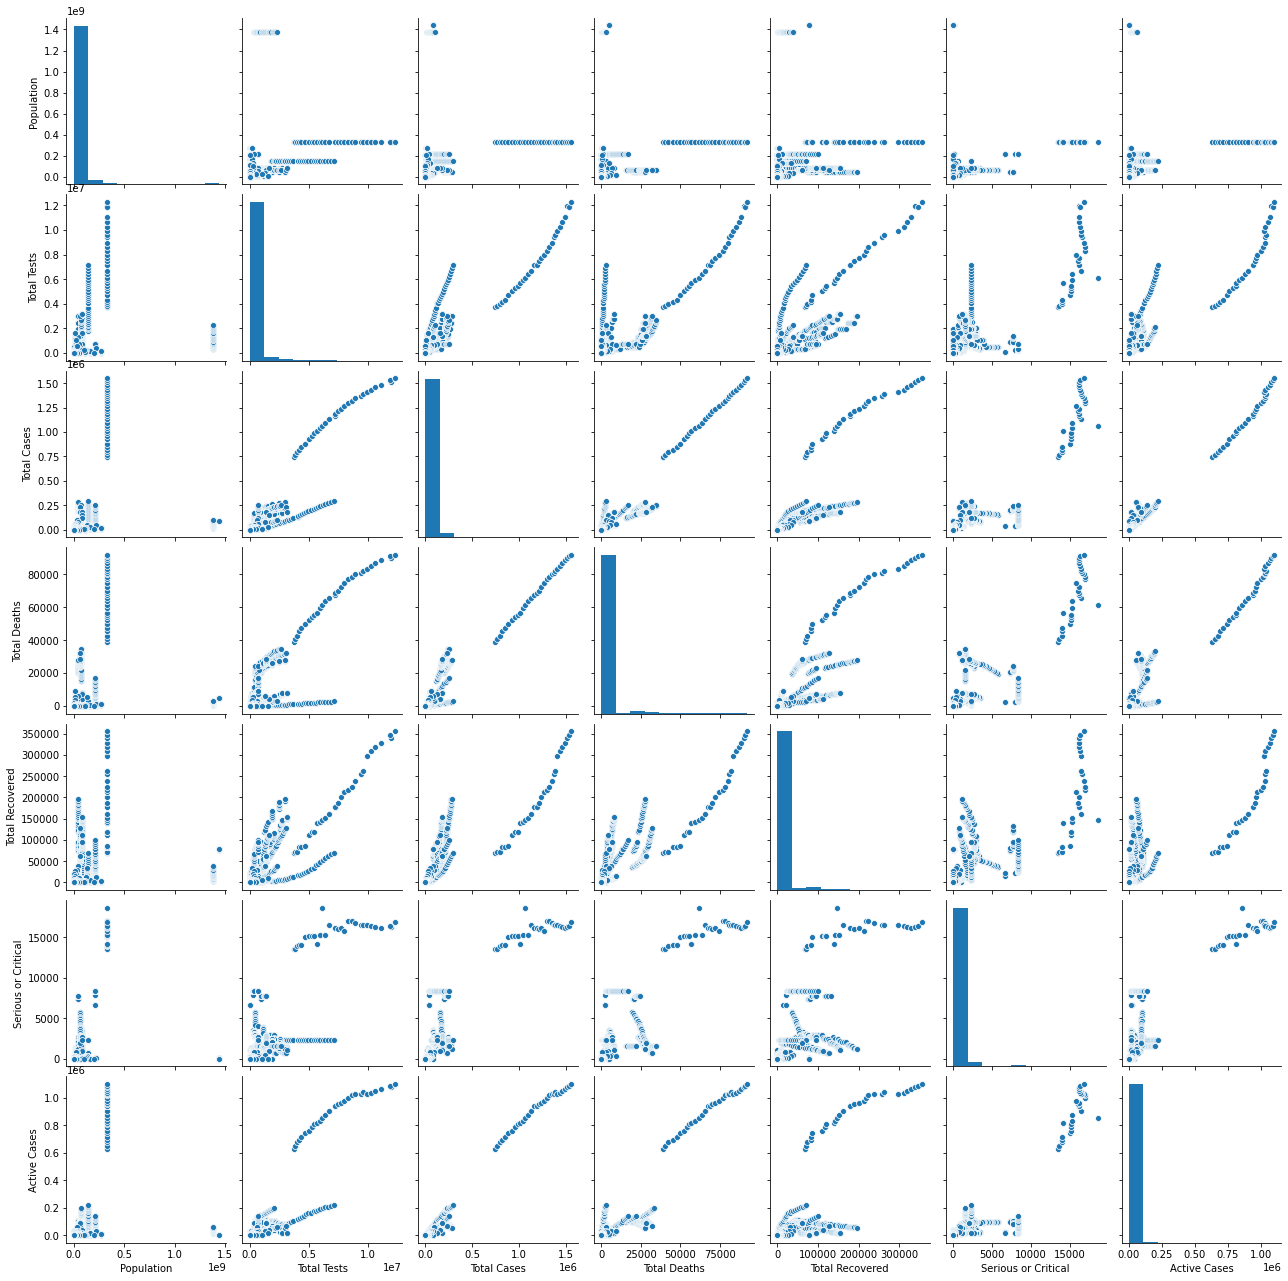

In [14]:
import seaborn as sns
sns.pairplot(df)
plt.show()

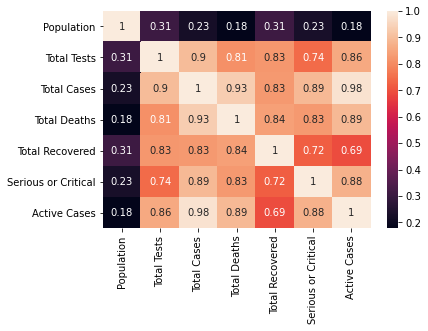

In [15]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
corr=df.corr()
sn.heatmap(corr,annot=True)
plt.show()

In [16]:
df.drop("Active Cases",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 412.8+ KB


In [17]:
mpgds=sn.load_dataset('mpg')
mpgds

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


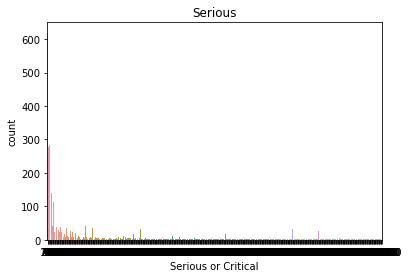

In [18]:
sn.countplot(df["Serious or Critical"])
plt.title("Serious")
plt.show()

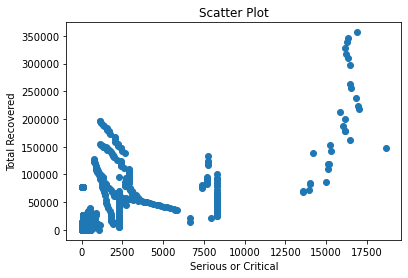

In [21]:
plt.scatter(df["Serious or Critical"],df["Total Recovered"])
plt.title("Scatter Plot")
plt.xlabel("Serious or Critical")
plt.ylabel("Total Recovered")
plt.show()

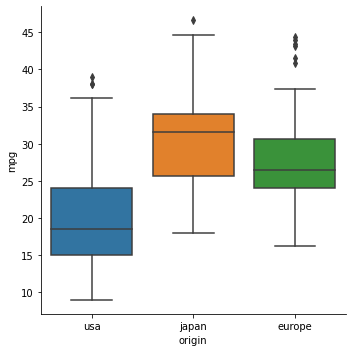

In [22]:
sn.catplot(data=mpgds,x='origin',y='mpg',kind='box')
plt.show()

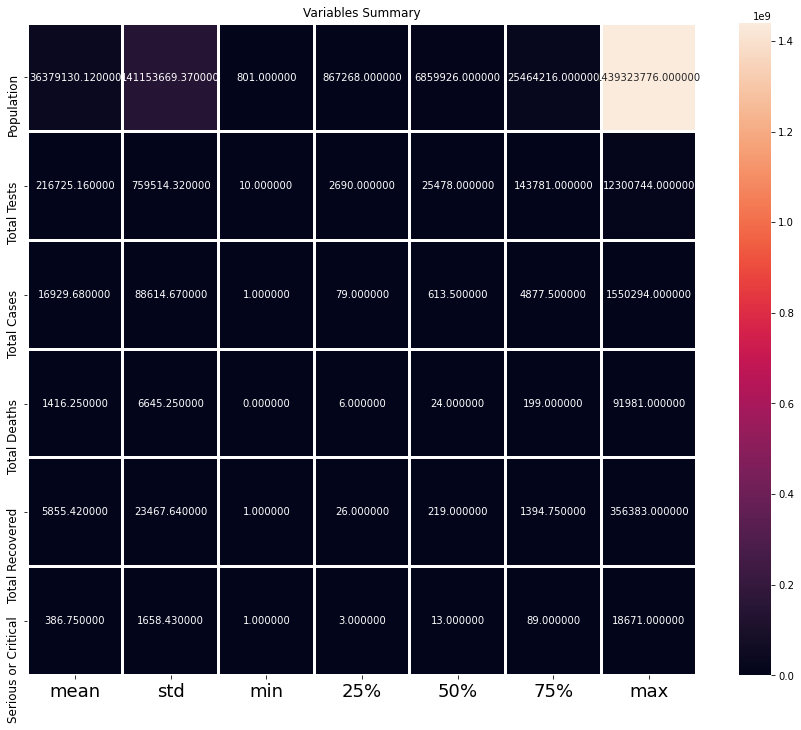

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002190C0461C0>,
      dtype=object)

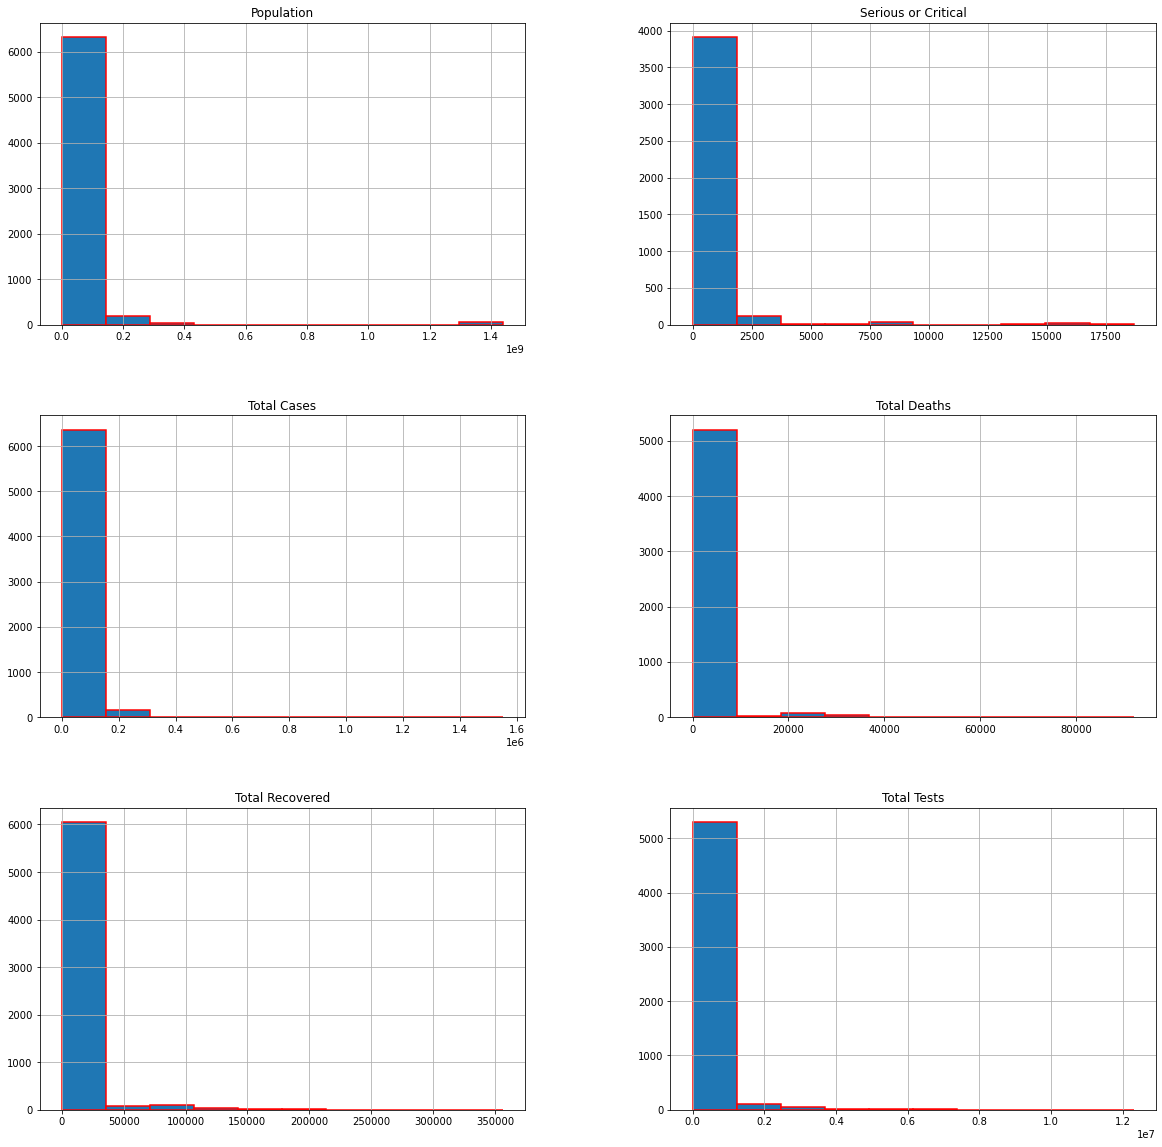

In [24]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

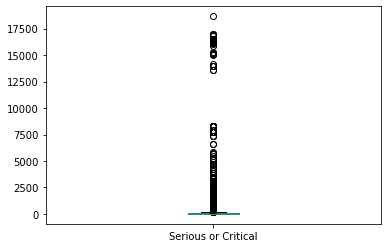

In [26]:
df['Serious or Critical'].plot.box()
plt.show()

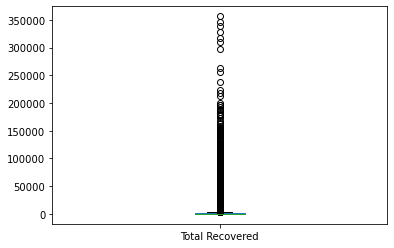

In [27]:
df['Total Recovered'].plot.box()
plt.show()

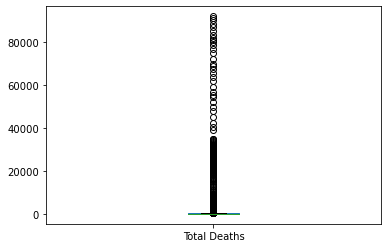

In [29]:
df['Total Deaths'].plot.box()
plt.show()

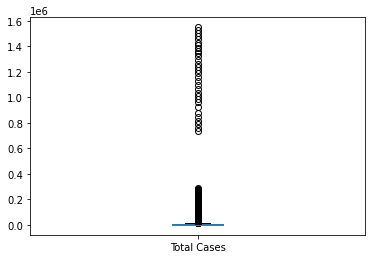

In [30]:
df['Total Cases'].plot.box()
plt.show()

In [31]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Population             24596948.00
Total Tests              141091.00
Total Cases                4798.50
Total Deaths                193.00
Total Recovered            1368.75
Serious or Critical          86.00
dtype: float64
